**Name - Arihant Gupta**
<br>
**Enrolment - E23CSEU0055**
<br>
**Batch - EB_02**
<br>
**Date - 26 Aug 2025**
<br>
**Lab - 08**
<br>

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, learning_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

Step 1: Load the Iris dataset from scikit-learn, with features X and labels y.
<br>
Step 2: Initialize a Decision Tree classifier with a fixed random state for 
reproducibility.

In [10]:
iris = load_iris()
X, y = iris.data, iris.target
dt_classifier = DecisionTreeClassifier(random_state=42)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [11]:
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
confusion_matrices = []

Use K-Fold cross-validation with 5 splits, enabling shuffling with a random 
seed.
<br>
 For each fold, split the data into training and test sets, train the model, predict, 
and compute key metrics (accuracy, precision, recall, F1-score). We also track class 
distributions in test folds.
<br>
Step 6 & 7: Visualize confusion matrices for each fold, labelling axes with class 
names.
<br>
Step 8: Visualize the class distribution in each fold’s test set to understand the data 
split.

Fold 1
Class distribution in test set: {0: 10, 1: 9, 2: 11}
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-Score: 1.00


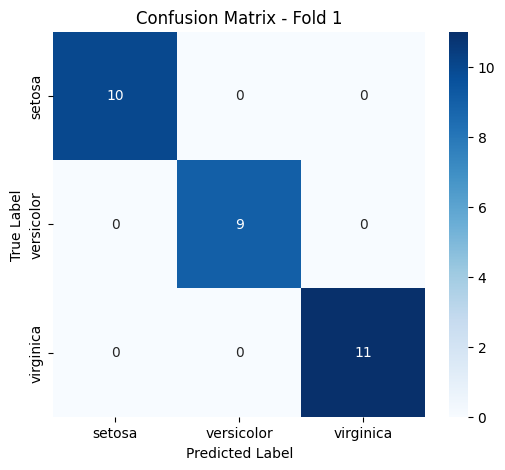

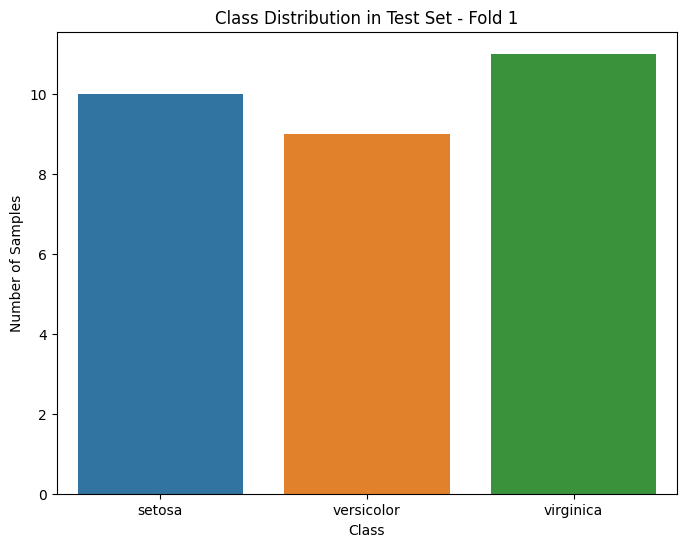

Fold 2
Class distribution in test set: {0: 13, 1: 10, 2: 7}
Accuracy: 0.97
Precision: 0.97
Recall: 0.97
F1-Score: 0.97


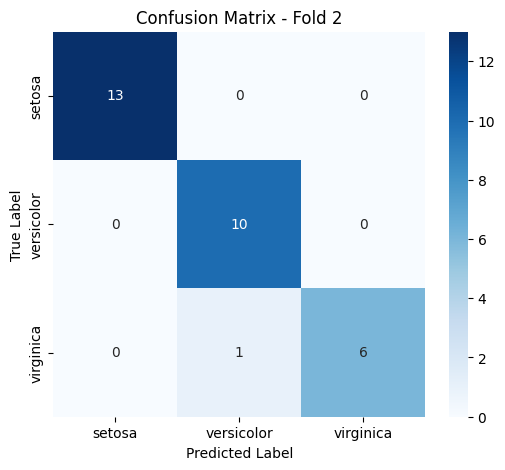

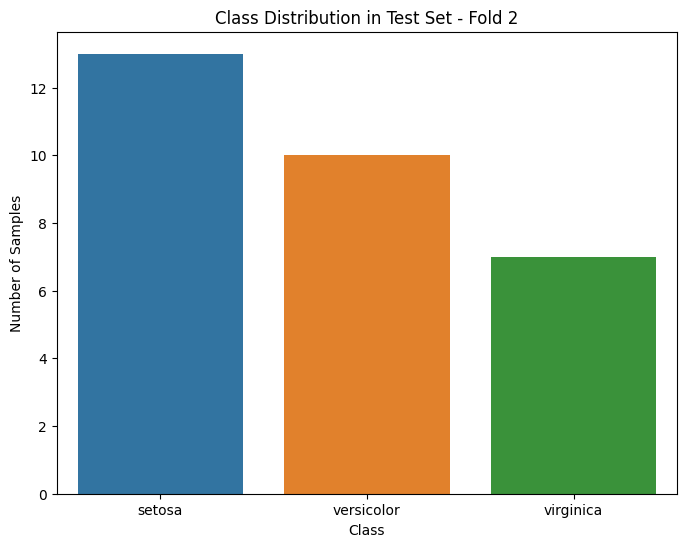

Fold 3
Class distribution in test set: {0: 12, 1: 10, 2: 8}
Accuracy: 0.93
Precision: 0.95
Recall: 0.93
F1-Score: 0.93


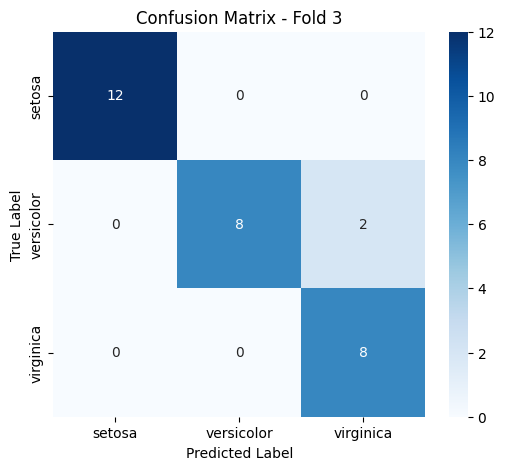

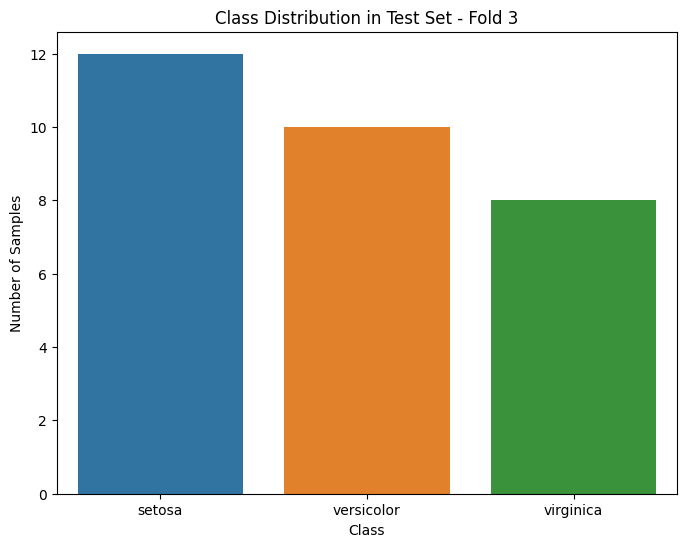

Fold 4
Class distribution in test set: {0: 8, 1: 10, 2: 12}
Accuracy: 0.93
Precision: 0.93
Recall: 0.93
F1-Score: 0.93


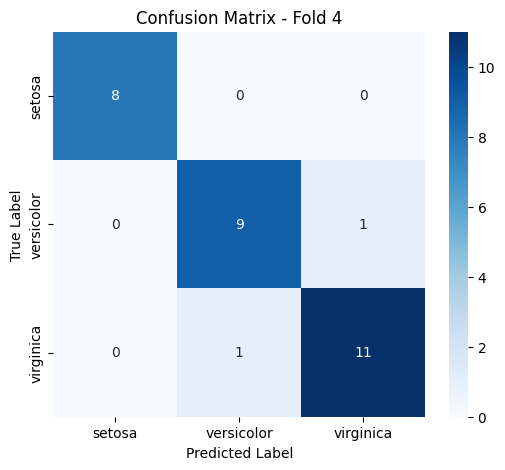

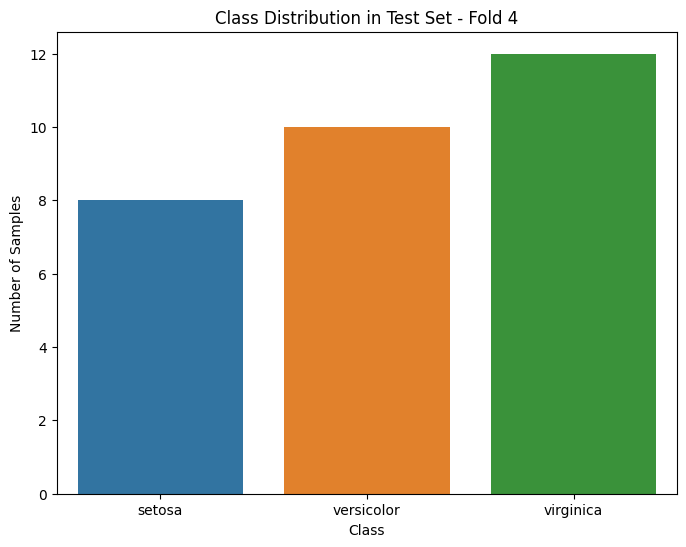

Fold 5
Class distribution in test set: {0: 7, 1: 11, 2: 12}
Accuracy: 0.93
Precision: 0.94
Recall: 0.93
F1-Score: 0.93


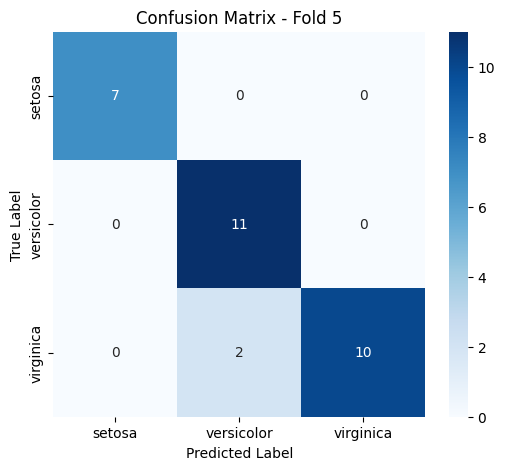

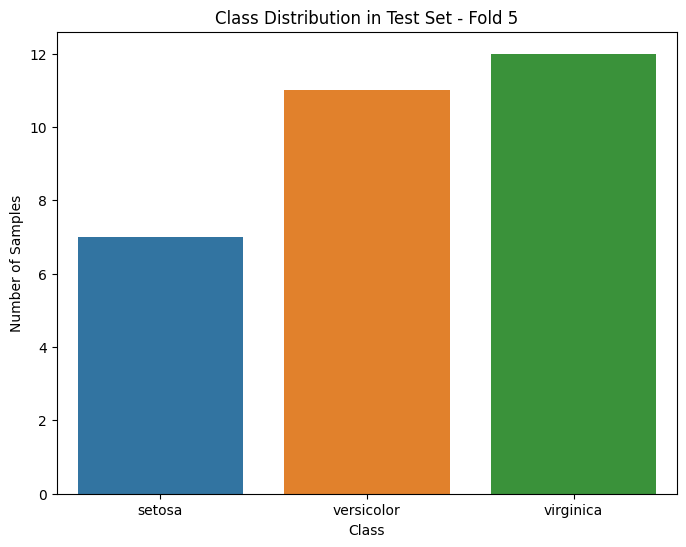

In [12]:
for fold, (train_index, test_index) in enumerate(kf.split(X)):
    print(f"Fold {fold + 1}")

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    unique, counts = np.unique(y_test, return_counts=True)
    class_distribution = dict(zip(unique, counts))
    print("Class distribution in test set:", class_distribution)

    dt_classifier.fit(X_train, y_train)
    
    y_pred = dt_classifier.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)
    
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    confusion_matrices.append(cm)

    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")
    
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
    plt.title(f'Confusion Matrix - Fold {fold + 1}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
    plt.close()

    plt.figure(figsize=(8, 6))
    sns.barplot(x=iris.target_names[unique], y=counts, hue=iris.target_names[unique])
    plt.title(f'Class Distribution in Test Set - Fold {fold + 1}')
    plt.xlabel('Class')
    plt.ylabel('Number of Samples')
    plt.show()
    plt.close()

Step 5: Print out the average performance over all folds. 

In [13]:
print("\n--- Average Performance Across All Folds ---")
print(f"Average Accuracy: {np.mean(accuracy_scores):.2f}")
print(f"Average Precision: {np.mean(precision_scores):.2f}")
print(f"Average Recall: {np.mean(recall_scores):.2f}")
print(f"Average F1-Score: {np.mean(f1_scores):.2f}")



--- Average Performance Across All Folds ---
Average Accuracy: 0.95
Average Precision: 0.96
Average Recall: 0.95
Average F1-Score: 0.95
